## Let's make a 2d plot with axes on the sides!
Load some useful modules, then the data

In [32]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib as mpl
from os.path import expanduser
# from mytools import griddata

In [33]:
def griddata(x,y,z,imshow=False):
    """
    Takes in three 1D arrays, x, y, and z, all of which must be the same length
    and which together form (xi,yi,zi) tuples, and creates a grid fit to be plotted
    with either imshow or pcolormesh

    if imshow = True, then the return is the array to plot followed by the extent to
    pass.  in this case, the array has been flipped to make it work with imshow; just do:
    H,extent = griddata(x,y,z,imshow=True)
    plt.imshow(H,extent=extent)

    if imshow = False, then the returns are the output of np.meshgrid and
    the gridded Z data; just do:
    X,Y,Z = griddata(x,y,z)
    plt.pcolormesh(X,Y,Z)

    """
    import numpy as np
    assert len(x) == len(y) == len(z)
    assert len(x) >= 2

    x,y,z = np.array(x),np.array(y),np.array(z)
    ux,uy = np.sort(np.unique(x)),np.sort(np.unique(y))
    X,Y = np.meshgrid(ux,uy)
    result = np.empty_like(X)
    for ii in range(ux.shape[0]):
        for jj in range(uy.shape[0]):
            tx,ty = X[jj,ii],Y[jj,ii]
            loc = (x==tx)&(y==ty)
            assert loc[loc].shape[0] == 1
            result[jj,ii] = z[loc]

    if imshow:
        extent = [ux[0]-(ux[1]-ux[0])/2.,ux[-1]+(ux[-1]-ux[-2])/2.,uy[0]-(uy[1]-uy[0])/2.,uy[-1]+(uy[-1]-uy[-2])/2.]
        return result[::-1],extent
    else:
        #now I need to offset the ux and uy arrays, which indicate the centers of the squares, by 1/2 so that they instead indicate the corners
        #need to make them go one above and one below
        nux = np.append(ux[0]-(ux[1]-ux[0]),ux) #make it go one further below
        nux = np.append(nux,nux[-1]+(nux[-1]-nux[-2]))

        nuy = np.append(uy[0]-(uy[1]-uy[0]),uy)
        nuy = np.append(nuy,nuy[-1]+(nuy[-1]-nuy[-2]))

        ox = (nux[:-1]+nux[1:])/2.
        oy = (nuy[:-1]+nuy[1:])/2.

        X,Y = np.meshgrid(ox,oy)

        return X,Y,result

In [2]:
indir = expanduser('~/Dropbox/LIGO_hosts/')

In [3]:
fname = indir+'lMgal_zform_rates_Z0.1PP04_dt10e7.npy'
outname = fname[:-len('.npy')]+'_2dplot.png'

In [4]:
#fname = 'lMgal_zform_rates_Z_dt5e8_dlm050.1PP04.npy'
#outname = fname[:-len('.npy')]+'_2dplot.png'

In [5]:
#fname = indir + 'lMgal_zform_rates_Z_dt5e8_dlm020.1PP04.npy'
#outname = fname[len(indir):]+'_2dplot.png'

In [6]:
logM,zform,rate= load(fname)
rate *= 1e9    #puts the rate in Gpc^-3 yr^-1
lograte = log10(rate)

In [7]:
logM_01,zform_01,rate_01 = load(indir+'lMgal_zform_rates_Z0.01PP04_dt10e7.npy')
rate_01 *= 1e9

In [8]:
logM_3,zform_3,rate_3 = load(indir+'lMgal_zform_rates_Z0.3PP04_dt10e7.npy')
rate_3 *= 1e9

Convert zform into lookback time:

In [11]:
Om = 0.3; Ol = 0.7; h = 0.7
from yt.utilities.cosmology import Cosmology
cosmo = Cosmology(hubble_constant=h,omega_matter=Om,omega_lambda=Ol)
tform = array([cosmo.lookback_time(0,z).in_units('Gyr').item() for z in zform])

In [12]:
if (zform_01 == zform).all():
    tform_01 = array(tform,copy=True)
else:
    tform_01 = array([cosmo.lookback_time(0,z).in_units('Gyr').item() for z in zform_01])

if (zform_3 == zform).all():
    tform_3 =  array(tform,copy=True)
else:    
    tform_3 = array([cosmo.lookback_time(0,z).in_units('Gyr').item() for z in zform_3])

##### Sum up the data in the vertical and horizontal direction:

In [13]:
uniqM = unique(logM)    #always working in logspace
uniqt = unique(tform) 

In [14]:
uniqM_01 = unique(logM_01)
uniqt_01 = unique(tform_01)

uniqM_3 = unique(logM_3)
uniqt_3 = unique(tform_3)

uniqM is the x array for the top plot; uniqt is the y array for the right plot (but the dependant axis)

Now I need to sum along each axis:

In [15]:
rate_top = empty_like(uniqM)
rate_right = empty_like(uniqt)

# dlogM = 0.2
# dt = 1e8  #years

for ii in range(uniqM.shape[0]):  
    rate_top[ii] = rate[logM==uniqM[ii]].sum()   #*dt   #don't multiply by dt because Astrid already did it
for ii in range(uniqt.shape[0]):
    rate_right[ii] = rate[tform==uniqt[ii]].sum()  #*dlogM #don't multiply by dlogM because Astrid already did it

In [16]:
rate_top_01 = empty_like(uniqM_01)
rate_right_01 = empty_like(uniqt_01)

# dlogM = 0.2
# dt = 1e8  #years

for ii in range(uniqM_01.shape[0]):  
    rate_top_01[ii] = rate_01[logM_01==uniqM_01[ii]].sum()   #*dt   #don't multiply by dt because Astrid already did it
for ii in range(uniqt_01.shape[0]):
    rate_right_01[ii] = rate_01[tform_01==uniqt_01[ii]].sum()  #*dlogM #don't multiply by dlogM because Astrid already did it

In [18]:
rate_top_3 = empty_like(uniqM_01)
rate_right_3 = empty_like(uniqt_01)

# dlogM = 0.2
# dt = 1e8  #years

for ii in range(uniqM_3.shape[0]):  
    rate_top_3[ii] = rate_3[logM_3==uniqM_3[ii]].sum()   #*dt   #don't multiply by dt because Astrid already did it
for ii in range(uniqt_01.shape[0]):
    rate_right_3[ii] = rate_3[tform_3==uniqt_3[ii]].sum()  #*dlogM #don't multiply by dlogM because Astrid already did it

Grid the data using a function I have

In [19]:
Mgrid,Tgrid,Rgrid = griddata(logM,tform,rate)

In [20]:
print min(log10(Rgrid.flatten())),max(log10(Rgrid.flatten())) 
print tform.min(),tform.max()
print zform.min(),zform.max()
print cosmo.lookback_time(0,0.1).in_units('Gyr')   #from Ned Wright, should be 1.3 Gyr

-4.93539603594 -0.0196883037996
1.30117056596 12.8321366978
0.1 7.95
1.30117056596 Gyr


Calculate some total rates:

In [22]:
print "Total rate, summing all boxes (0.1): {0}".format(Rgrid.flatten().sum())
print "Total rate for 0.01:  {0}".format(rate_top_01.sum())
print "Total rate for 0.3:  {0}".format(rate_top_3.sum())

Total rate, summing all boxes (0.1): 3686.65579782
Total rate for 0.01:  140.863340164
Total rate for 0.3:  13662.7471497


In [28]:
print "As a check, the rates summing the top and right axes:"
print "Top:  {0}".format(rate_top.sum())
print "Right: {0}".format(rate_right.sum())

As a check, the rates summing the top and right axes:
Top:  3686.65579782
Right: 3686.65579782


##### Make the plot!

In [29]:
xtickloc = [7,8,9,10,11]
xtickstr = ['$'+str(kk)+'$' for kk in xtickloc]

ytickloc = [0,2,4,6,8,10,12]
ytickstr = ['$'+str(kk)+'$' for kk in ytickloc]

# toptickloc = [3,3.5,4,4.5]
# toptickstr = ['$'+str(kk)+'$' for kk in toptickloc]

righttickloc = [-2,0,2]
righttickstr = ['$'+str(kk)+'$' for kk in righttickloc]

vmin = -5
vmax = .0

ctickloc = [vmin,(vmin+vmax)/2.,vmax]
ctickstr = ['$'+str(kk)+'$' for kk in ctickloc]

fontsize = 24

cornermax = 3.25
cornermin = -2

Saved /Users/shea/Dropbox/LIGO_hosts/lMgal_zform_rates_Z0.1PP04_dt10e7_2dplot.png


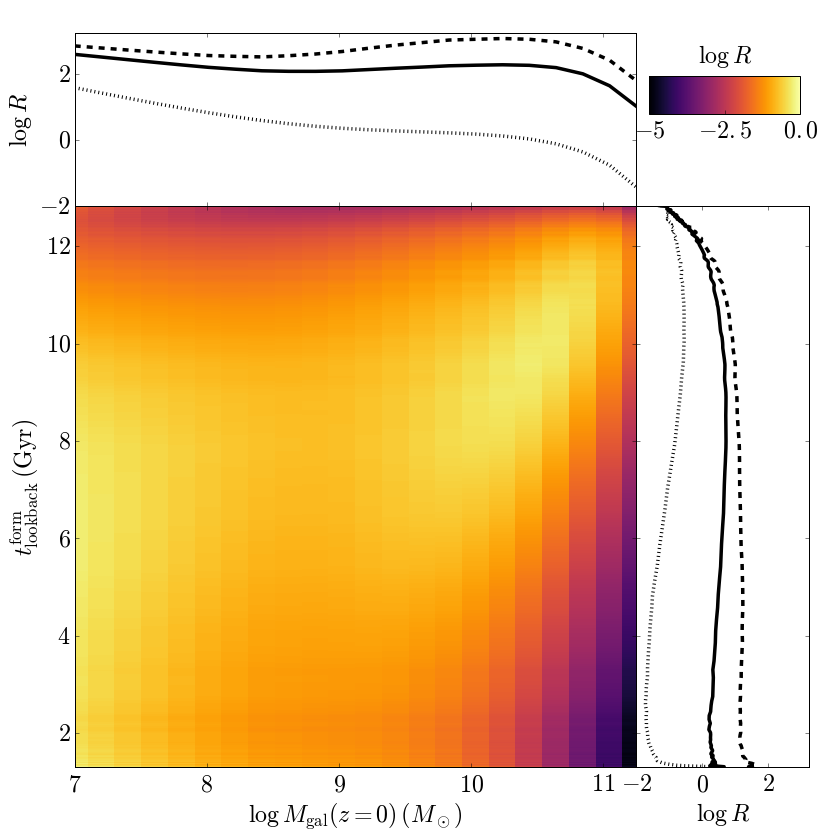

In [31]:
fig = plt.figure(figsize=(12,12))
main_ax = plt.axes([0.1,0.1,0.65,0.65])
top_ax = plt.axes([0.1,0.75,0.65,0.2],sharex=main_ax)
right_ax = plt.axes([0.75,0.1,0.2,0.65],sharey=main_ax)
vertical_cbar = False

if vertical_cbar:
#     cax = plt.axes([0.825,0.825,0.05,0.175])
    cax = plt.axes([0.785,0.815,0.05,0.15])
else:
    cax = plt.axes([0.765,0.825,0.175,0.15])
# cax = plt.axes([0.8,0.8,0.2,0.2])
    
cax.set_axis_off()
plt.setp(top_ax.get_xticklabels(),visible=False)
plt.setp(right_ax.get_yticklabels(),visible=False)

im = main_ax.pcolormesh(Mgrid,Tgrid,log10(Rgrid),cmap='inferno',vmin=vmin,vmax=vmax)

top_ax.plot(uniqM,log10(rate_top),'k-',lw=3.5)
right_ax.plot(log10(rate_right),uniqt,'k-',lw=3.5)

top_ax.plot(uniqM_01,log10(rate_top_01),'k:',lw=3.5)
right_ax.plot(log10(rate_right_01),uniqt_01,'k:',lw=3.5)

top_ax.plot(uniqM_3,log10(rate_top_3),'k--',lw=3.5)
right_ax.plot(log10(rate_right_3),uniqt_3,'k--',lw=3.5)

main_ax.set_xlabel(r'$\log\,M_\mathrm{gal}(z = 0)\,(M_\odot)$',fontsize=fontsize)
main_ax.set_ylabel(r'$t_\mathrm{lookback}^\mathrm{form}\,\mathrm{(Gyr)}$',fontsize=fontsize)
right_ax.set_xlabel(r'$\log\,R$',fontsize=fontsize)
top_ax.set_ylabel(r'$\log\,R$',fontsize=fontsize)

main_ax.set_xticks(xtickloc)
main_ax.set_xticklabels(xtickstr,fontsize=fontsize)

main_ax.set_yticks(ytickloc)
main_ax.set_yticklabels(ytickstr,fontsize=fontsize)

main_ax.set_xlim(logM.min(),logM.max())
top_ax.set_xlim(main_ax.get_xlim())

main_ax.set_ylim(tform.min(),tform.max())
right_ax.set_ylim(main_ax.get_ylim())


top_ax.set_ylim(cornermin,cornermax)
right_ax.set_xlim(cornermin,cornermax)

top_ax.set_yticks(righttickloc)
top_ax.set_yticklabels(righttickstr,fontsize=fontsize)

right_ax.set_xticks(righttickloc)
right_ax.set_xticklabels(righttickstr,fontsize=fontsize)

# loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
# right_ax.xaxis.set_major_locator(loc)
# top_ax.yaxis.set_major_locator(loc)

# norm = mpl.colors.Normalize(vmin=min(log10(Rgrid.flatten())), vmax=max(log10(Rgrid.flatten())))
# cbar = mpl.colorbar.ColorbarBase(cax,cmap='inferno',norm=norm,orientation='horizontal')
# cbar.set_label('test')

cbar = plt.colorbar(im,orientation='horizontal',fraction=0.5,aspect=4)

cbar.set_label(r'$\log\,R$',fontsize=fontsize,labelpad=-100,horizontalalignment='center')
cbar.set_ticks(ctickloc)
cbar.set_ticklabels(ctickstr)
for t in cbar.ax.xaxis.get_ticklabels():
    t.set_fontsize(fontsize)
    
# cax.set_xlabel(r'$\log_{10}(Rate)$',fontsize=24)
# plt.figtext(0.81,0.815+0.155,r'$\log\,\mathrm{Rate}$',fontsize=24,ha='left',va='bottom')

plt.savefig(outname)
print "Saved "+outname